In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv', sep=",")
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 12)

In [5]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

## Data preparation and cleaning

In [6]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [7]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
print("Amount of duplicated values:",df.duplicated().sum())

Amount of duplicated values: 0


In [31]:
df['churn'].value_counts()
#data is imbalanced as almost 80% of people have not churned their account.

churn
0    7963
1    2037
Name: count, dtype: int64

## Data processing and visualisation

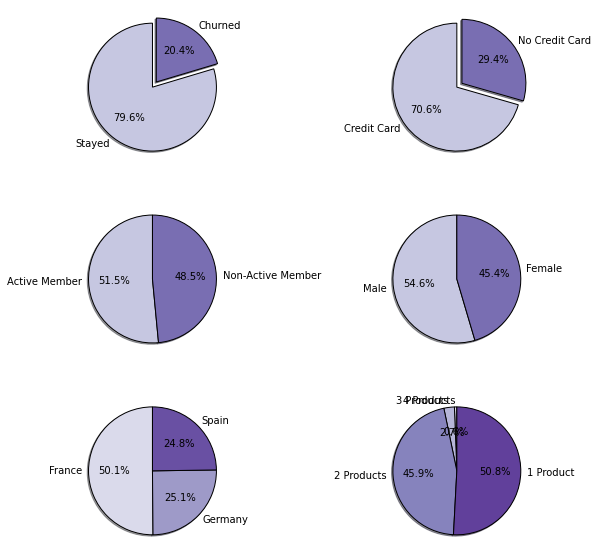

In [59]:
myexplode = [0, 0.1]
mycolors = sns.color_palette("Purples", 2)

plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
amounts = [df.churn[df['churn']==0].count(), df.churn[df['churn']==1].count()]
plt.pie(amounts, explode=myexplode, labels=("Stayed", "Churned"), shadow=True, startangle=90, colors=mycolors, autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

plt.subplot(3,2,2)
amounts = [df.country[df['credit_card']==1].count(), df.churn[df['credit_card']==0].count()]
plt.pie(amounts, explode=myexplode, labels=("Credit Card", "No Credit Card"), shadow=True, startangle=90, colors=mycolors, autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

plt.subplot(3,2,3)
amounts = [df.churn[df['active_member']==1].count(), df.churn[df['active_member']==0].count()]
plt.pie(amounts, labels=("Active Member", "Non-Active Member"), shadow=True, startangle=90, colors=mycolors, autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

plt.subplot(3,2,4)
amounts = [df.churn[df['gender']=="Male"].count(), df.churn[df['gender']=="Female"].count()]
plt.pie(amounts, labels=("Male", "Female"), shadow=True, startangle=90, colors=mycolors, autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

plt.subplot(3,2,5)
amounts = [df.churn[df['country']=="France"].count(), df.churn[df['country']=="Germany"].count(), df.churn[df['country']=="Spain"].count()]
plt.pie(amounts, labels=("France", "Germany", "Spain"), shadow=True, startangle=90, colors=sns.color_palette("Purples", 3), autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

plt.subplot(3,2,6)
amounts = [df.churn[df['products_number']==4].count(), df.churn[df['products_number']==3].count(), df.churn[df['products_number']==2].count(), df.churn[df['products_number']==1].count()]
plt.pie(amounts, labels=("4 Products", "3 Products", "2 Products", "1 Product"), shadow=True, startangle=90, colors=sns.color_palette("Purples", 4), autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

plt.show()

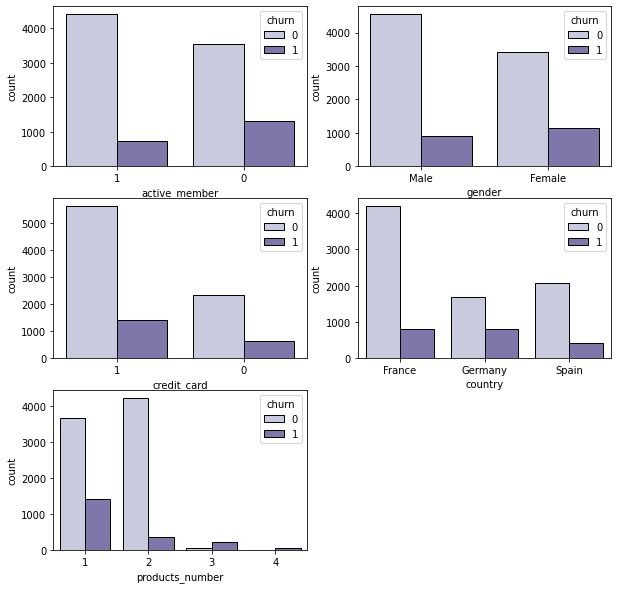

In [12]:
plt.figure(figsize=(10, 10))
plt.subplot(3,2,1)
plt.xlabel('active_member', fontsize=10)
plt.ylabel('count', fontsize=10)
count_plt = sns.countplot(data=df, x='active_member', hue='churn', order=df['active_member'].value_counts().index, palette=mycolors , edgecolor="black")

plt.subplot(3,2,2)
plt.xlabel('gender', fontsize=10)
plt.ylabel('count', fontsize=10)
count_plt = sns.countplot(data=df, x='gender', hue='churn', order=df['gender'].value_counts().index, palette=mycolors, edgecolor="black")

plt.subplot(3,2,3)
plt.xlabel('credit_card', fontsize=10)
plt.ylabel('count', fontsize=10)
count_plt = sns.countplot(data=df, x='credit_card', hue='churn', order=df['credit_card'].value_counts().index, palette=mycolors, edgecolor="black")

plt.subplot(3,2,4)
plt.xlabel('country', fontsize=10)
plt.ylabel('count', fontsize=10)
count_plt = sns.countplot(data=df, x='country', hue='churn', order=df['country'].value_counts().index, palette=mycolors, edgecolor="black")

plt.subplot(3,2,5)
plt.xlabel('products_number', fontsize=10)
plt.ylabel('count', fontsize=10)
count_plt = sns.countplot(data=df, x='products_number', hue='churn', order=df['products_number'].value_counts().index, palette=mycolors, edgecolor="black")




From the above bar graphs we can see that:
- Germany has a relativley high churn rate
- If the products number is 2, the churn rate is very low otherwise the churn rate is high
- Female's have a higher churn rate then male's
- Non-active members have a higher churn rate then active members

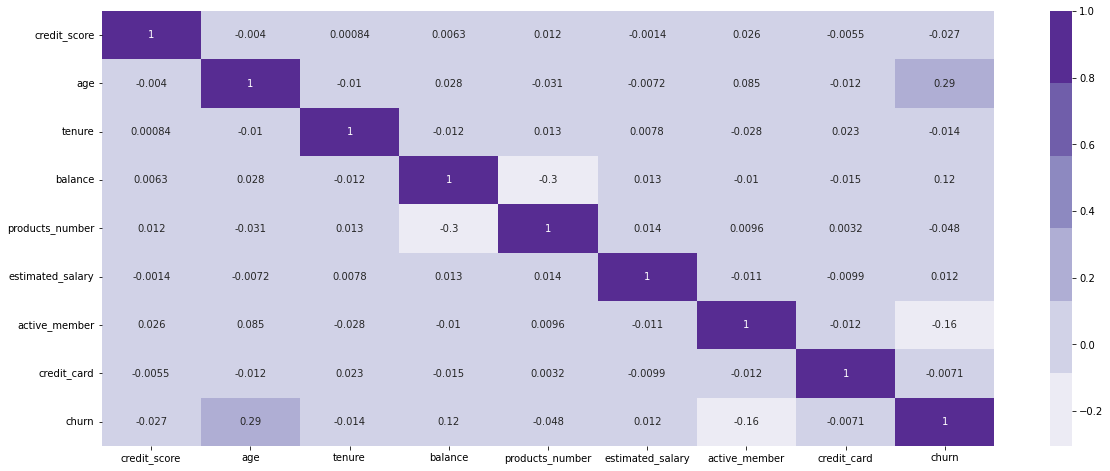

In [57]:
plt.figure(figsize=(20,8))
sns.heatmap(df[['credit_score','age','tenure','balance','products_number','estimated_salary','active_member','credit_card','churn']].corr(), cmap=sns.color_palette("Purples"), annot=True)
plt.show()

From the above heatmap we can see that:
- No numerical values are closely linked
- Churn is most related to age: 0.29
- Churn is also linked to balance: 0.12
- Non-Churn is also linked to active_members: 0.16
- Not one value from the table can be used to determine the churn rate, multiple values will need to be used